Data Understanding

In [235]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [236]:
df = pd.read_csv('Supplement_Sales_Weekly_Expanded.csv')

In [237]:
df.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            5 non-null      object 
 1   Product Name    5 non-null      object 
 2   Category        5 non-null      object 
 3   Units Sold      5 non-null      int64  
 4   Price           5 non-null      float64
 5   Revenue         5 non-null      float64
 6   Discount        5 non-null      float64
 7   Units Returned  5 non-null      int64  
 8   Location        5 non-null      object 
 9   Platform        5 non-null      object 
dtypes: float64(3), int64(2), object(5)
memory usage: 532.0+ bytes


In [238]:
df.describe()

,Units Sold,Price,Revenue,Discount,Units Returned
count,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000
mean,150.200274,34.781229,5226.569446,0.124398,1.531478
std,12.396099,14.198309,2192.491946,0.071792,1.258479
min,103.000000,10.000000,1284.000000,0.000000,0.000000
25%,142.000000,22.597500,3349.372500,0.060000,1.000000
50%,150.000000,34.720000,5173.140000,0.120000,1.000000
75%,158.000000,46.712500,7009.960000,0.190000,2.000000
max,194.000000,59.970000,10761.850000,0.250000,8.000000


Data preparation

1. Data Cleaning

In [239]:
df.duplicated().sum()

0

In [240]:
df.isnull().sum()

Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64

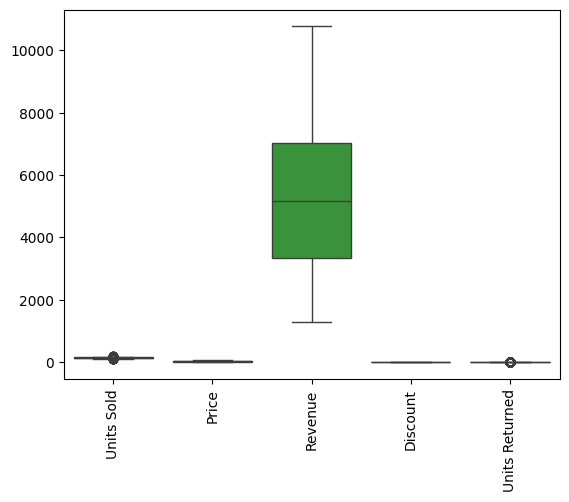

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(df)

sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

**2. Missing value**

In [244]:
df.notnull()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
4379,True,True,True,True,True,True,True,True,True,True
4380,True,True,True,True,True,True,True,True,True,True
4381,True,True,True,True,True,True,True,True,True,True
4382,True,True,True,True,True,True,True,True,True,True


In [245]:
missing = df.isnull().sum()
missing = missing[missing > 0]
print("Kolom dengan missing values:\n", missing)

Kolom dengan missing values:
 Series([], dtype: int64)


3. Outlier

In [246]:
def handle_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower, lower, df[col])
        df[col] = np.where(df[col] > upper, upper, df[col])
    return df

In [247]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df = handle_outliers(df, numeric_cols)
print (df)

            Date        Product Name     Category  Units Sold  Price  Revenue  \
0     2020-01-06        Whey Protein      Protein       143.0  31.98  4573.14   
1     2020-01-06           Vitamin C      Vitamin       139.0  42.51  5908.89   
2     2020-01-06            Fish Oil        Omega       161.0  12.91  2078.51   
3     2020-01-06        Multivitamin      Vitamin       140.0  16.07  2249.80   
4     2020-01-06         Pre-Workout  Performance       157.0  35.47  5568.79   
...          ...                 ...          ...         ...    ...      ...   
4379  2025-03-31           Melatonin    Sleep Aid       160.0  47.79  7646.40   
4380  2025-03-31              Biotin      Vitamin       154.0  38.12  5870.48   
4381  2025-03-31   Green Tea Extract   Fat Burner       139.0  20.40  2835.60   
4382  2025-03-31     Iron Supplement      Mineral       154.0  18.31  2819.74   
4383  2025-03-31  Electrolyte Powder    Hydration       178.0  39.12  6963.36   

      Discount  Units Retur

4. Transformasi data

In [248]:
from sklearn.preprocessing import LabelEncoder

le_location = LabelEncoder()
le_category = LabelEncoder()

df['Location_encoded'] = le_location.fit_transform(df['Location'])
df['Category_encoded'] = le_category.fit_transform(df['Category'])

print(df['Location_encoded'])
print(df['Category_encoded'])

0       0
1       1
2       0
3       0
4       0
       ..
4379    2
4380    1
4381    2
4382    0
4383    1
Name: Location_encoded, Length: 4384, dtype: int32
0       7
1       9
2       5
3       9
4       6
       ..
4379    8
4380    9
4381    1
4382    4
4383    3
Name: Category_encoded, Length: 4384, dtype: int32


In [249]:
from sklearn.preprocessing import StandardScaler

In [250]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_cols])

In [251]:
df_scaled = pd.DataFrame(df_scaled, columns=numeric_cols)
print (df_scaled)

      Units Sold     Price   Revenue  Discount  Units Returned
0      -0.584786 -0.197316 -0.298064 -1.315034        0.483238
1      -0.910129  0.544407  0.311243 -1.175727       -1.325142
2       0.879257 -1.540587 -1.436000  1.749735       -1.325142
3      -0.828793 -1.318000 -1.357865 -0.618496       -1.325142
4       0.553914  0.048516  0.156105  1.749735        1.387429
...          ...       ...       ...       ...             ...
4379    0.797921  0.916324  1.103815  1.192504       -0.420952
4380    0.309907  0.235180  0.293722  1.331812       -0.420952
4381   -0.910129 -1.012999 -1.090650 -0.061265        1.387429
4382    0.309907 -1.160216 -1.097885  1.471120        0.483238
4383    2.261964  0.305618  0.792244  1.471120       -1.325142

[4384 rows x 5 columns]


5. Seleksi Fitur

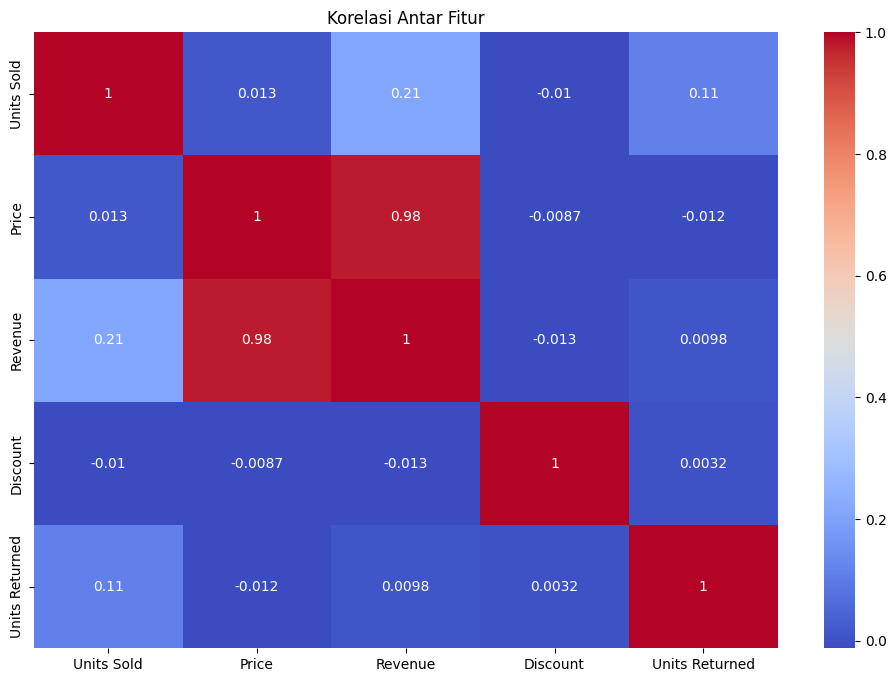

In [252]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()


<h1><b>Data Modeling</b></h1>

<h3>1. Naive Bayes</h3>

<h5>Data Balancing<h5>

In [315]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [313]:
print(df['Location'].value_counts())
print(df['Location'].value_counts(normalize=True))

Location
Canada    1507
UK        1475
USA       1402
Name: count, dtype: int64
Location
Canada    0.343750
UK        0.336451
USA       0.319799
Name: proportion, dtype: float64


In [302]:
le_location = LabelEncoder()
le_category = LabelEncoder()

X = le_location.fit_transform(df['Category']).reshape(-1, 1)
y = le_category.fit_transform(df['Location'])

print(X)
print(y)

[[7]
 [9]
 [5]
 ...
 [1]
 [4]
 [3]]
[0 1 0 ... 2 0 1]


In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [304]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [305]:
y_pred = model.predict(X_test)

In [306]:
print("accuracy: ", accuracy_score(y_test, y_pred))

accuracy:  0.30444697833523376


In [307]:
print("confusion matrix:", confusion_matrix(y_test, y_pred))

confusion matrix: [[  0 300   0]
 [  0 267   0]
 [  0 310   0]]


In [308]:
print("classification report:", classification_report(y_test, y_pred, target_names=le_category.classes_))

classification report:               precision    recall  f1-score   support

      Canada       0.00      0.00      0.00       300
          UK       0.30      1.00      0.47       267
         USA       0.00      0.00      0.00       310

    accuracy                           0.30       877
   macro avg       0.10      0.33      0.16       877
weighted avg       0.09      0.30      0.14       877



c:\Users\firma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\firma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\firma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [309]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

In [312]:
pred_proba = model.predict_proba(X_test)

In [318]:
n_classes = len(model.classes_)
y_test_bin = label_binarize(y_test, classes=model.classes_)

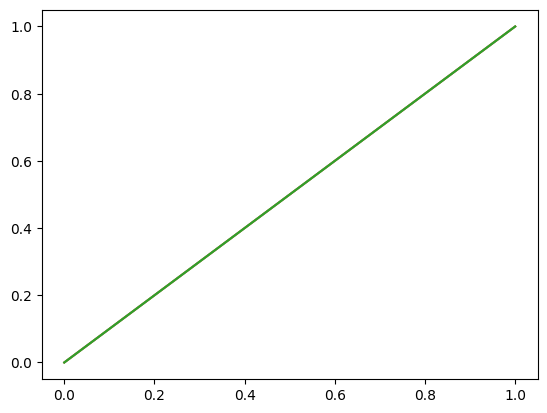

In [322]:
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{le_location.inverse_transform([model.classes_[i]])[0]} (AUC = {roc_auc:.2f})')

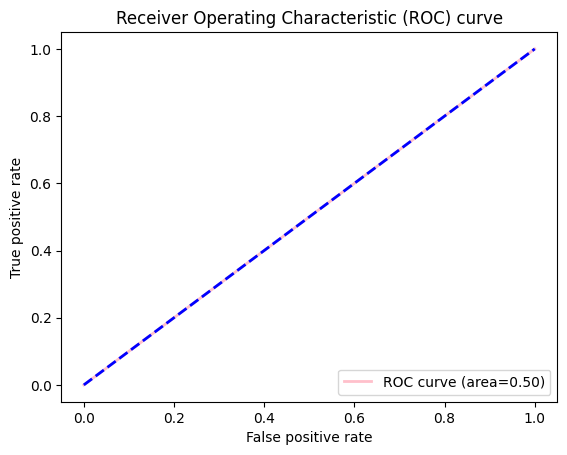

In [323]:
plt.Figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='pink', lw=2, label='ROC curve (area=%0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc='lower right')
plt.show()

<h3>Clustering – KMeans</h3>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X_clust = df[['Units Sold', 'Revenue', 'Discount', 'Units Returned']]
scaler = StandardScaler()
X_clust_scaled = scaler.fit_transform(X_clust)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_clust_scaled)

df['Cluster'] = clusters  # opsional, jika ingin dianalisis lebih lanjut


<h1><b>Evaluation</b></h1>

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score, root_mean_squared_error, silhouette_score